# Práctica 6 - Modularidad e Identificación de Comunidades

## Objetivo
En esta práctica se propone implementar en una función para el cálculo de la modularidad de una red, y posteriormente implementar el algoritmo de Girvan-Newman para la partición de una red mediante la eliminación sucesiva de los enlaces de mayor betweenness.
## 1 Modularidad
### 1.1 Implementar una función que calcula la modularidad de una red no dirigida para una partición de los nodos propuesta. 
La función tendrá como argumentos de entrada:
- Un objeto Graph (Networkx)
- Un diccionario con la partición, e.g. { ‘node1’: c1, ‘node2’:c2, …}



In [10]:
#Imports
import networkx as nx
from itertools import product
from networkx.algorithms import community

import numpy as np
import matplotlib.pyplot as plt

Función que calcula la modularidad de una red ND para una particion de nodos.

In [11]:
def calcularModularidad(red, diccionario):
    Q = 0

    nx.set_edge_attributes(red, {e:1 for e in red.edges}, 'peso')

    A = nx.to_scipy_sparse_matrix(red).astype(float)

    out_degree = in_degree = dict(nx.degree(red))
    m = red.number_of_edges()
    nodos = list(red)

    for i, j in product(range(len(nodos)),range(len(nodos))):
        if(diccionario[nodos[i]] == diccionario[nodos[j]]):
            Q += np.sum(A[i,j] - (out_degree[nodos[i]]*in_degree[nodos[j]]/(2*m)))
    
    return Q/(2*m)



### 1.2 Comprobar el valor de la modularidad para los siguientes ejemplos:
Ejemplo de Wikipedia (modularidad de la partición de colores = 0.4896)


In [12]:
def definicionGrafo():
    # Creamos el grafo de la red de contactos propuesta
    G = nx.Graph()
    # Agregamos los nodos
    G.add_edges_from([(1,2),(1,3),(3,2),(1,4),(4,5),(5,6),(6,7),(7,5),(4,8),(8,9),(9,10),(10,8)])


    # Creamos el diccionario de nodos
    nodos = list(G)
    diccionario = {}
    for e in nodos:
        if e <= 4:
            diccionario[e] = 1
        elif 5 <= e <= 8:
            diccionario[e] = 2
        else:
            diccionario[e] = 3

    return G, diccionario

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4276\3533271965.py:6: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  A = nx.to_scipy_sparse_matrix(red).astype(float)


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

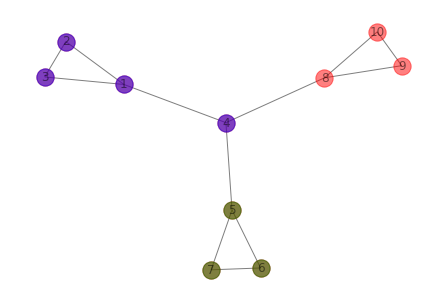

In [13]:
red, nodos = definicionGrafo()

pos = nx.fruchterman_reingold_layout(red,k=0.25)
nx.draw(red, pos, with_labels=True, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(red, pos, nodelist=[1,2,3,4], node_color='b', alpha=0.5)
nx.draw_networkx_nodes(red, pos, nodelist=[5,6,7], node_color='g', alpha=0.5)

print("La modularidad de la red es:", calcularModularidad(red, nodos))